Multioutput (Multilabel) CNN based Fruit Classification - Keras.
Background: Use Cases of Fruit Classification.
Fruit classification can play a major practical role besides the educational point. Multiple interesting applications of this technology can be developed and explored with deep learning.

Use Case 1: Sorting Ripe Fruits

The practical implementation is in sorting ripe fruits and non-ripe ones. An example is an automated fruit sorting process based on Deep Learning that can readily sort between ripe bananas and green ones making the process of packaging bananas easier.

Use Case 2: Fruits Spoilage.

Deep Learning may be useful in the detection of spoiled fruits, including the presence of fungus on their surface. Automation of this process helps reduce the waste as well as improves quality control of fruit distribution centers.

Use Case 3: Inventory Management.

The classification of fruits can help in the stock in the grocery store and warehouse management. By being able to automatically identify and process various types of fruits in stock, businesses will be able to optimize their supply chain and guarantee sufficient stock.

Application 4: Fruit Disease Detection.

Using Deep Learning models, one can detect indicators of diseases or pests that can affect the health of the fruit by looking at the images of fruits. Timely intervention is realized through early detection and this helps avoid the spread of diseases as well as protect crop yields.

Fruit classification can be effectively applied based on the capabilities of Deep Learning as an alternative to the use of the traditional manual method in agricultural, horticultural and botany sectors. When we employ these models, we will be able to inject efficiency and accuracy in several processes that are related to fruits.

At this point we have learned about some of the best applications of fruit classification with Deep Learning, and it is time to start the fruit classification model!

**1. Introduction:**

Fruits form a very vital component in our diets. Sorting is also an essential step in different production processes that require the use of fruits and the introduction of AI systems is transforming this process with very precise deep learning models.

**Challenge:**

The grading and identification of fruits is a difficult process because they have different shapes, colors, and textures. The key difficulties are the distinction between the varieties of various kinds of the fruits and the differentiation of various kinds of one kind of fruit. Proper classification of fruits would be critical in setting their prices in the supermarkets.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import zipfile

zip_path = "/content/drive/MyDrive/archive.zip"
extract_path = "/content/archive_dataset"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Extraction complete!")

Extraction complete!


In [16]:
# Modules used for interacting with files, folders, and system-level operations
import os as sys_os
import shutil as sys_shutil
import glob as sys_glob
import random as rnd

# Suppress unnecessary warning messages
import warnings
warnings.filterwarnings('ignore')

# Packages for numerical calculations and data manipulation
import numpy as np
import math as mth
import pandas as pd

# Tools for plotting graphs, loading images, and visual rendering
import matplotlib.pyplot as plot
import matplotlib.image as img_reader
import seaborn as sea
from PIL import Image as pil_image

# Deep learning and neural network components
import tensorflow as tf_core
from tensorflow.keras.optimizers import RMSprop as rms_opt, Adam as adam_opt
from tensorflow.keras.models import Sequential as SeqModel
from tensorflow.keras import layers as tf_layers
from tensorflow.keras.layers import BatchNormalization as BatchNorm
from tensorflow.keras.layers import Dense as DenseLayer, Flatten as FlatLayer, Conv2D as ConvLayer
from tensorflow.keras.losses import sparse_categorical_crossentropy as sparse_loss
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgGen

In [26]:
# Path to extracted dataset
data_root = "/content/archive_dataset/fruits-360_100x100/fruits-360"

# Training and testing folders
train_dir = data_root + "/Training"
test_dir  = data_root + "/Test"

In [27]:
import os

def get_class_count(dir_path):
    class_total = 0
    for _, subdirs, _ in os.walk(dir_path):
        class_total += len(subdirs)
        break  # only top level
    return class_total

total_classes = get_class_count(train_dir)
print(f"Total number of classes found in the training set: {total_classes}")

print(sorted(os.listdir(train_dir))[:10])
print("Total folders:", len(os.listdir(train_dir)))


Total number of classes found in the training set: 228
['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6']
Total folders: 228


In [28]:
# Function to count how many category folders exist inside the dataset
def get_class_count(dir_path):
    class_total = 0
    for _, subdirs, _ in sys_os.walk(dir_path):
        class_total += len(subdirs)
        break   # Only examine the first level of the directory
    return class_total

# Calculate the number of fruit categories in the training directory
total_classes = get_class_count(train_dir)
print(f"Total number of classes found in the training set: {total_classes}")

Total number of classes found in the training set: 228


In [29]:
import os

print(sorted(os.listdir(train_dir)))
print("Total folders:", len(os.listdir(train_dir)))


['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Braeburn 1', 'Apple Core 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple Rotten 1', 'Apple hit 1', 'Apple worm 1', 'Apricot 1', 'Avocado 1', 'Avocado Black 1', 'Avocado Black 2', 'Avocado Green 1', 'Avocado ripe 1', 'Banana 1', 'Banana 3', 'Banana 4', 'Banana Lady Finger 1', 'Banana Red 1', 'Beans 1', 'Beetroot 1', 'Blackberrie 1', 'Blackberrie 2', 'Blackberrie half rippen 1', 'Blackberrie not rippen 1', 'Blueberry 1', 'Cabbage red 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cactus fruit green 1', 'Cactus fruit red 1', 'Caju seed 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherimoya 1', 'Cherry 1', 

In [31]:
# Retrieve all category names (directory names) inside the main training path
class_names = [
    item for item in os.listdir(train_dir)
    if os.path.isdir(os.path.join(train_dir, item))
]

# Arrange the category names in alphabetical order
ordered_classes = sorted(class_names)

# Display the organized list of class folders
print("Alphabetically Sorted Classes:")
for cname in ordered_classes:
    print(cname)

Alphabetically Sorted Classes:
Apple 10
Apple 11
Apple 12
Apple 13
Apple 14
Apple 17
Apple 18
Apple 19
Apple 5
Apple 6
Apple 7
Apple 8
Apple 9
Apple Braeburn 1
Apple Core 1
Apple Crimson Snow 1
Apple Golden 1
Apple Golden 2
Apple Golden 3
Apple Granny Smith 1
Apple Pink Lady 1
Apple Red 1
Apple Red 2
Apple Red 3
Apple Red Delicious 1
Apple Red Yellow 1
Apple Red Yellow 2
Apple Rotten 1
Apple hit 1
Apple worm 1
Apricot 1
Avocado 1
Avocado Black 1
Avocado Black 2
Avocado Green 1
Avocado ripe 1
Banana 1
Banana 3
Banana 4
Banana Lady Finger 1
Banana Red 1
Beans 1
Beetroot 1
Blackberrie 1
Blackberrie 2
Blackberrie half rippen 1
Blackberrie not rippen 1
Blueberry 1
Cabbage red 1
Cabbage white 1
Cactus fruit 1
Cactus fruit green 1
Cactus fruit red 1
Caju seed 1
Cantaloupe 1
Cantaloupe 2
Carambula 1
Carrot 1
Cauliflower 1
Cherimoya 1
Cherry 1
Cherry 2
Cherry 3
Cherry 4
Cherry 5
Cherry Rainier 1
Cherry Rainier 2
Cherry Rainier 3
Cherry Sour 1
Cherry Wax Black 1
Cherry Wax Red 1
Cherry Wax Red 2

In [32]:
# Build a new directory structure to hold the trimmed dataset
def setup_dirs(target_root):
    # Make the main output directory if it doesn't already exist
    os.makedirs(target_root, exist_ok=True)

    # Prepare subfolders for training and testing data under the new root
    train_subdir = os.path.join(target_root, "training")
    test_subdir = os.path.join(target_root, "test")
    os.makedirs(train_subdir, exist_ok=True)
    os.makedirs(test_subdir, exist_ok=True)

if __name__ == "__main__":
    target_root = "/kaggle/working/refined_dataset"
    setup_dirs(target_root)

    print(f"Base directory created at: {target_root}")
    print(f"Training directory set up successfully inside {target_root}.")
    print(f"Testing directory set up successfully inside {target_root}.")

Base directory created at: /kaggle/working/refined_dataset
Training directory set up successfully inside /kaggle/working/refined_dataset.
Testing directory set up successfully inside /kaggle/working/refined_dataset.


In [37]:
import shutil
import os

def transfer_class_folders(src_root, tgt_root, class_keywords):
    if not os.path.exists(src_root):
        print("The provided source directory was not found.")
        return

    available_groups = os.listdir(src_root)

    for keyword in class_keywords:
        key = keyword.lower()
        matched_sets = [grp for grp in available_groups if grp.lower().startswith(key)]

        if not matched_sets:
            print(f"No folder variations detected for '{keyword}'.")
            continue

        for grp in matched_sets:
            src_dir = os.path.join(src_root, grp)
            tgt_dir = os.path.join(tgt_root, grp)

            try:
                shutil.copytree(src_dir, tgt_dir)
                print(f"Copied '{grp}' successfully into {tgt_root}.")
            except FileExistsError:
                print(f"'{grp}' is already present in the destination directory.")

if __name__ == "__main__":
    train_source = "/content/archive_dataset/fruits-360_100x100/fruits-360/Training"
    train_target = "/content/working/filtered_dataset/training"  # or whatever you used before

    chosen_classes = [
        "Apple", "Banana", "Cherry", "Guava", "Grape",
        "Lychee", "Pineapple", "Rambutan", "Raspberry",
        "Redcurrant", "Salak"
    ]

    transfer_class_folders(train_source, train_target, chosen_classes)

if __name__ == "__main__":
    test_source = "/content/archive_dataset/fruits-360_100x100/fruits-360/Test"
    test_target = "/content/working/filtered_dataset/test"

    chosen_classes = [
        "Apple", "Banana", "Cherry", "Guava", "Grape",
        "Lychee", "Pineapple", "Rambutan", "Raspberry",
        "Redcurrant", "Salak"
    ]

    transfer_class_folders(test_source, test_target, chosen_classes)

Copied 'Apple hit 1' successfully into /content/working/filtered_dataset/training.
Copied 'Apple Red 3' successfully into /content/working/filtered_dataset/training.
Copied 'Apple 10' successfully into /content/working/filtered_dataset/training.
Copied 'Apple 8' successfully into /content/working/filtered_dataset/training.
Copied 'Apple Core 1' successfully into /content/working/filtered_dataset/training.
Copied 'Apple Braeburn 1' successfully into /content/working/filtered_dataset/training.
Copied 'Apple Red 1' successfully into /content/working/filtered_dataset/training.
Copied 'Apple 7' successfully into /content/working/filtered_dataset/training.
Copied 'Apple 13' successfully into /content/working/filtered_dataset/training.
Copied 'Apple Red Yellow 1' successfully into /content/working/filtered_dataset/training.
Copied 'Apple Pink Lady 1' successfully into /content/working/filtered_dataset/training.
Copied 'Apple Red 2' successfully into /content/working/filtered_dataset/training.

In [40]:
training_subset="/content/working/filtered_dataset/training"
test_subset="/content/working/filtered_dataset/test"

# function to count images in each folder
def count_images_per_label(folder_path):
    label_counts = {
        label: len(os.listdir(os.path.join(folder_path, label)))
        for label in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, label))
    }

    return label_counts

if __name__ == "__main__":
    # Count images in training folders
    training_label_counts = count_images_per_label(training_subset)
    test_label_counts = count_images_per_label(test_subset)
    sorted_training_label_counts = sorted(training_label_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_test_label_counts = sorted(test_label_counts.items(), key=lambda x: x[1], reverse=True)
print("Training Label Counts (sorted by count):")
for label, count in sorted_training_label_counts:
    print(f"{label}: {count}")
print("Test Label Counts (sorted by count):")
for label, count in sorted_test_label_counts:
    print(f"{label}: {count}")

Training Label Counts (sorted by count):
Grape Blue 1: 984
Cherry Rainier 1: 738
Cherry 2: 738
Apple 19: 729
Apple hit 1: 702
Cherry 3: 699
Apple 10: 699
Apple 13: 699
Cherry 4: 699
Cherry Rainier 2: 696
Apple worm 1: 696
Apple 7: 694
Apple 9: 694
Cherry 5: 693
Apple 8: 687
Cherry Rainier 3: 686
Cherry Wax not ripen 1: 675
Apple Red Yellow 2: 672
Apple 17: 610
Pineapple Mini 1: 493
Grapefruit White 1: 492
Apple Braeburn 1: 492
Apple Red 1: 492
Cherry Wax Black 1: 492
Apple Red Yellow 1: 492
Apple Red 2: 492
Cherry Wax Yellow 1: 492
Redcurrant 1: 492
Apple Granny Smith 1: 492
Rambutan 1: 492
Cherry Wax Red 1: 492
Apple Golden 2: 492
Cherry 1: 492
Grape Pink 1: 492
Grape White 3: 492
Guava 1: 490
Lychee 1: 490
Banana 1: 490
Grape White 1: 490
Grapefruit Pink 1: 490
Banana Red 1: 490
Pineapple 1: 490
Grape White 2: 490
Raspberry 1: 490
Apple Red Delicious 1: 490
Salak 1: 490
Apple Rotten 1: 488
Apple 18: 484
Apple Golden 3: 481
Apple Golden 1: 480
Apple 6: 473
Grape White 4: 471
Apple Cor

In [42]:
# Function to calculate how many image files exist inside a directory tree
def get_image_count(dir_path):
    img_total = 0
    for _, _, file_list in os.walk(dir_path):
        img_total += len(file_list)
    return img_total

# Counting images in the overall dataset and in the separated sets
overall_img_count = get_image_count(data_root)
train_img_count = get_image_count(training_subset)
test_img_count = get_image_count(test_subset)

# Showing the number of image files found in each section
print(f"Total images found in the complete dataset: {overall_img_count}")
print(f"Images available in the training portion: {train_img_count}")
print(f"Images available in the testing portion: {test_img_count}")

Total images found in the complete dataset: 159951
Images available in the training portion: 36227
Images available in the testing portion: 12067


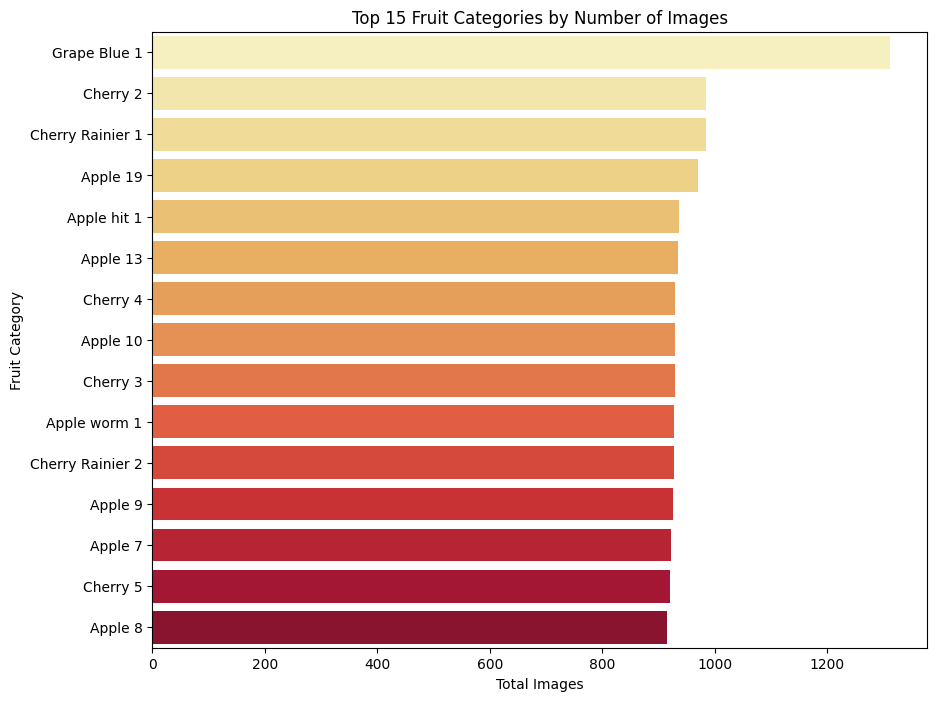

In [44]:
# Merge training and testing label totals into one dictionary
merged_counts = {
    lbl: training_label_counts.get(lbl, 0) + test_label_counts.get(lbl, 0)
    for lbl in set(list(training_label_counts.keys()) + list(test_label_counts.keys()))
}

# Build a DataFrame that stores the total occurrences of each fruit class
fruit_stats_df = pd.DataFrame({
    "Category": list(merged_counts.keys()),
    "Image_Count": list(merged_counts.values())
})

# Arrange the DataFrame from highest to lowest count
fruit_stats_df = fruit_stats_df.sort_values(by="Image_Count", ascending=False)

# Extract the top 15 categories with the highest image frequencies
top_fifteen = fruit_stats_df.head(15)

# Draw a horizontal bar graph to show the top fruit categories
plot.figure(figsize=(10, 8))
sea.barplot(x="Image_Count", y="Category", data=top_fifteen, palette="YlOrRd")
plot.xlabel("Total Images")
plot.ylabel("Fruit Category")
plot.title("Top 15 Fruit Categories by Number of Images")
plot.show()

In [45]:
# Updated model configuration settings
BATCH_COUNT = 32
IMG_DIMENSION = 100
COLOR_CHANNELS = 3
TRAINING_EPOCHS = 10

In [47]:
import tensorflow as tf

# Create the input pipeline for the training images
train_data_flow = tf.keras.preprocessing.image_dataset_from_directory(
    training_subset,          # folder containing the selected training images
    seed=42,                  # ensures repeatable shuffling
    shuffle=True,             # randomize the order of images
    image_size=(IMG_DIMENSION, IMG_DIMENSION),  # resize images to uniform size
    batch_size=BATCH_COUNT    # number of images per training batch
)

Found 36227 files belonging to 68 classes.


In [48]:
# Display the list of class labels present in the training set
train_labels = train_data_flow.class_names
train_labels

['Apple 10',
 'Apple 11',
 'Apple 12',
 'Apple 13',
 'Apple 14',
 'Apple 17',
 'Apple 18',
 'Apple 19',
 'Apple 5',
 'Apple 6',
 'Apple 7',
 'Apple 8',
 'Apple 9',
 'Apple Braeburn 1',
 'Apple Core 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apple Rotten 1',
 'Apple hit 1',
 'Apple worm 1',
 'Banana 1',
 'Banana 3',
 'Banana 4',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Cherry 1',
 'Cherry 2',
 'Cherry 3',
 'Cherry 4',
 'Cherry 5',
 'Cherry Rainier 1',
 'Cherry Rainier 2',
 'Cherry Rainier 3',
 'Cherry Sour 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Red 2',
 'Cherry Wax Red 3',
 'Cherry Wax Yellow 1',
 'Cherry Wax not ripen 1',
 'Cherry Wax not ripen 2',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',


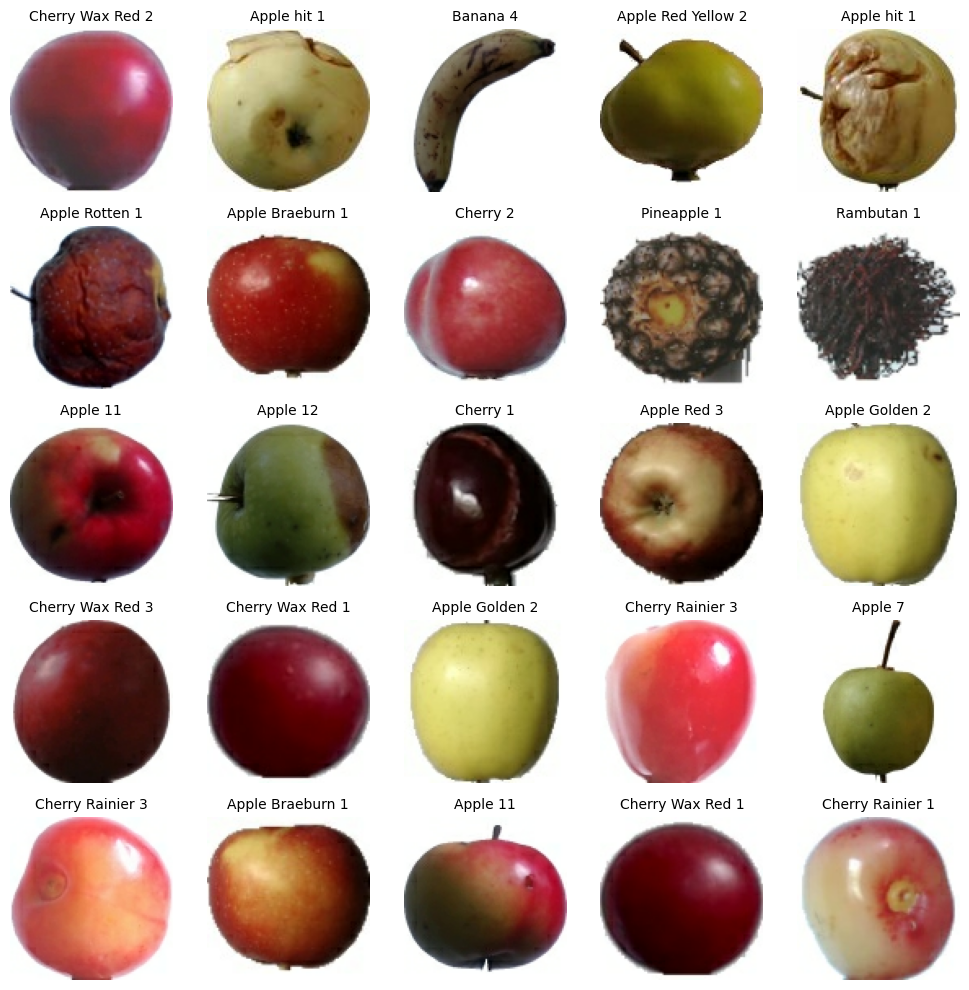

In [50]:
# preview a grid of sample images from the training pipeline
plot.figure(figsize=(10, 10))

for img_batch, lbl_batch in train_data_flow.take(9):
    for idx in range(25):
        ax = plot.subplot(5, 5, idx + 1)
        plot.imshow(img_batch[idx].numpy().astype("uint8"))
        plot.title(train_labels[lbl_batch[idx]], fontsize=10)
        plot.axis("off")

plot.tight_layout()
plot.show()

In [51]:
# Utility to divide a dataset into training and validation subsets
def split_tf_dataset(dataset, train_ratio=0.8, val_ratio=0.2, do_shuffle=True, buffer_size=10000):
    # ensure the ratios add up correctly
    assert (train_ratio + val_ratio) == 1

    total_len = len(dataset)

    # shuffle dataset elements if enabled
    if do_shuffle:
        dataset = dataset.shuffle(buffer_size, seed=1234)

    # compute how many samples go into each subset
    train_count = int(train_ratio * total_len)
    val_count = int(val_ratio * total_len)

    # slice the dataset into the respective partitions
    train_subset = dataset.take(train_count)
    val_subset = dataset.skip(train_count).take(val_count)

    return train_subset, val_subset

In [52]:
train_split_set, val_split_set = split_tf_dataset(train_data_flow)

In [53]:
# Display how many batches are contained in each split
print("Size of the training split:", len(train_split_set))
print("Size of the validation split:", len(val_split_set))

Size of the training split: 906
Size of the validation split: 226


In [54]:
# Improve pipeline efficiency by adding caching, shuffling, and prefetching
train_split_set = train_split_set.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_split_set = val_split_set.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [57]:
# Adjust image dimensions and normalize pixel values
img_preprocessor = tf_core.keras.Sequential([
    tf_layers.Resizing(IMG_DIMENSION, IMG_DIMENSION),
    tf_layers.Rescaling(1.0 / 255),
])

In [58]:
# fetch batches ahead of time to speed up the training pipeline
train_split_set = train_split_set.prefetch(buffer_size=tf.data.AUTOTUNE)

**2. Building a multi-task or multi-output model in Keras**

In [59]:
# Specify the dimensional structure of each input batch for the CNN
cnn_input_shape = (BATCH_COUNT, IMG_DIMENSION, IMG_DIMENSION, COLOR_CHANNELS)

# Determine how many distinct label categories exist
total_classes = len(train_labels)
total_classes

68

In [65]:
# Build the convolutional network architecture
cnn_model = SeqModel([
    img_preprocessor,   # resizing + normalization layer

    tf_layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf_layers.MaxPooling2D((2, 2)),

    tf_layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf_layers.MaxPooling2D((2, 2)),

    tf_layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf_layers.MaxPooling2D((2, 2)),

    tf_layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf_layers.MaxPooling2D((2, 2)),

    tf_layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf_layers.MaxPooling2D((2, 2)),

    tf_layers.Flatten(),
    tf_layers.Dense(512, activation='relu'),
    tf_layers.Dropout(0.25),
    tf_layers.Dense(total_classes, activation='softmax'),   # output layer
])

# initialize the model with the correct input dimensions
cnn_model.build(input_shape=cnn_input_shape)

In [66]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 100, 100, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 98, 98, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 49, 49, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 47, 47, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 23, 23, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 21, 21, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 10, 10, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 8, 8, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 4, 4, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 2, 2, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 1, 1, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 512)              │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 68)               │        34,884 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,356 (938.89 KB)

 Trainable params: 240,356 (938.89 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# configure the optimization method and evaluation metrics for training
cnn_model.compile(
    optimizer='rmsprop',
    loss=tf_core.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [63]:
# record the model's performance during the training process
train_history = cnn_model.fit(
    train_split_set,
    validation_data=val_split_set,
    epochs=TRAINING_EPOCHS
)

Epoch 1/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.4150 - loss: 2.1732 - val_accuracy: 0.9318 - val_loss: 0.1888
Epoch 2/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.9216 - loss: 0.2205 - val_accuracy: 0.9789 - val_loss: 0.0437
Epoch 3/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.9610 - loss: 0.1083 - val_accuracy: 0.9835 - val_loss: 0.0336
Epoch 4/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.9710 - loss: 0.0810 - val_accuracy: 0.9746 - val_loss: 0.0977
Epoch 5/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.9790 - loss: 0.0644 - val_accuracy: 0.9914 - val_loss: 0.0190
Epoch 6/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.9796 - loss: 0.0622 - val_accuracy: 0.9904 - val_loss: 0.0266
Epoch 7/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.9832 - loss: 0.0510 - val_accuracy: 0.9932 - val_loss: 0.0172
Epoch 8/10
906/906 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.9860 - loss: 0.0441 - 

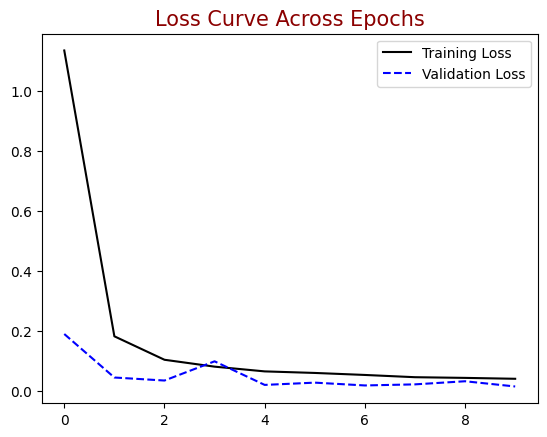

In [68]:
# Visualize how the training and validation loss changed over epochs
plot.figure()
plot.plot(train_history.history["loss"], label="Training Loss", color="black")
plot.plot(train_history.history["val_loss"], label="Validation Loss", color="blue", linestyle="dashed")
plot.title("Loss Curve Across Epochs", color="darkred", fontsize=15)
plot.legend()
plot.show()

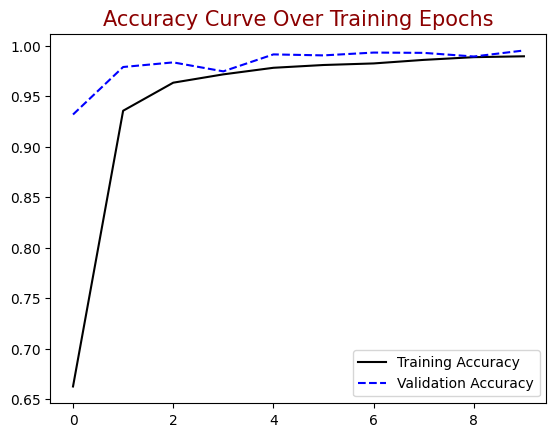

In [70]:
# Visualize the accuracy progression for both training and validation sets
plot.figure()
plot.plot(train_history.history["accuracy"], label="Training Accuracy", color="black")
plot.plot(train_history.history["val_accuracy"], label="Validation Accuracy", color="blue", linestyle="dashed")
plot.title("Accuracy Curve Over Training Epochs", color="darkred", fontsize=15)
plot.legend()
plot.show()

**3. Predicting unseen images from test dataset**

In [72]:
# Build the input pipeline for the test image directory
test_data_flow = tf.keras.preprocessing.image_dataset_from_directory(
    test_subset,                     # path to filtered test set
    seed=42,                            # ensures deterministic shuffling
    shuffle=True,                       # random ordering of samples
    image_size=(IMG_DIMENSION, IMG_DIMENSION),
    batch_size=BATCH_COUNT
)

Found 12067 files belonging to 68 classes.


In [73]:
# Obtain the list of class names present in the test dataset
test_labels = test_data_flow.class_names
test_labels

['Apple 10',
 'Apple 11',
 'Apple 12',
 'Apple 13',
 'Apple 14',
 'Apple 17',
 'Apple 18',
 'Apple 19',
 'Apple 5',
 'Apple 6',
 'Apple 7',
 'Apple 8',
 'Apple 9',
 'Apple Braeburn 1',
 'Apple Core 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apple Rotten 1',
 'Apple hit 1',
 'Apple worm 1',
 'Banana 1',
 'Banana 3',
 'Banana 4',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Cherry 1',
 'Cherry 2',
 'Cherry 3',
 'Cherry 4',
 'Cherry 5',
 'Cherry Rainier 1',
 'Cherry Rainier 2',
 'Cherry Rainier 3',
 'Cherry Sour 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Red 2',
 'Cherry Wax Red 3',
 'Cherry Wax Yellow 1',
 'Cherry Wax not ripen 1',
 'Cherry Wax not ripen 2',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',


Sample image selected for prediction:
Actual class: Cherry 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predicted class: Apple Red Yellow 2


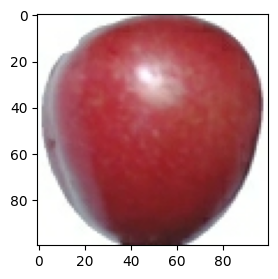

In [75]:
# Generate a prediction for one sample image from the test pipeline
plot.figure(figsize=(3, 3))

for img_batch, lbl_batch in test_data_flow.take(1):

    sample_img = img_batch[0].numpy().astype('uint8')
    sample_label = lbl_batch[0].numpy()

    print("Sample image selected for prediction:")
    plot.imshow(sample_img)

    print("Actual class:", test_labels[sample_label])

    preds = cnn_model.predict(img_batch)
    print("Predicted class:", train_labels[np.argmax(preds[0])])

In [79]:
# function to predict the class label for a given test image
def generate_prediction(model_obj, image_tensor):
    # convert the input image to array format
    image_arr = tf_core.keras.preprocessing.image.img_to_array(image_tensor)
    image_arr = tf.expand_dims(image_arr, 0)  # add batch dimension

    # obtain prediction scores from the model
    pred_output = model_obj.predict(image_arr)

    # decode prediction into class label + confidence
    predicted_lbl = test_labels[np.argmax(pred_output[0])]
    confidence_score = round(100 * np.max(pred_output[0]), 2)

    return predicted_lbl, confidence_score

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

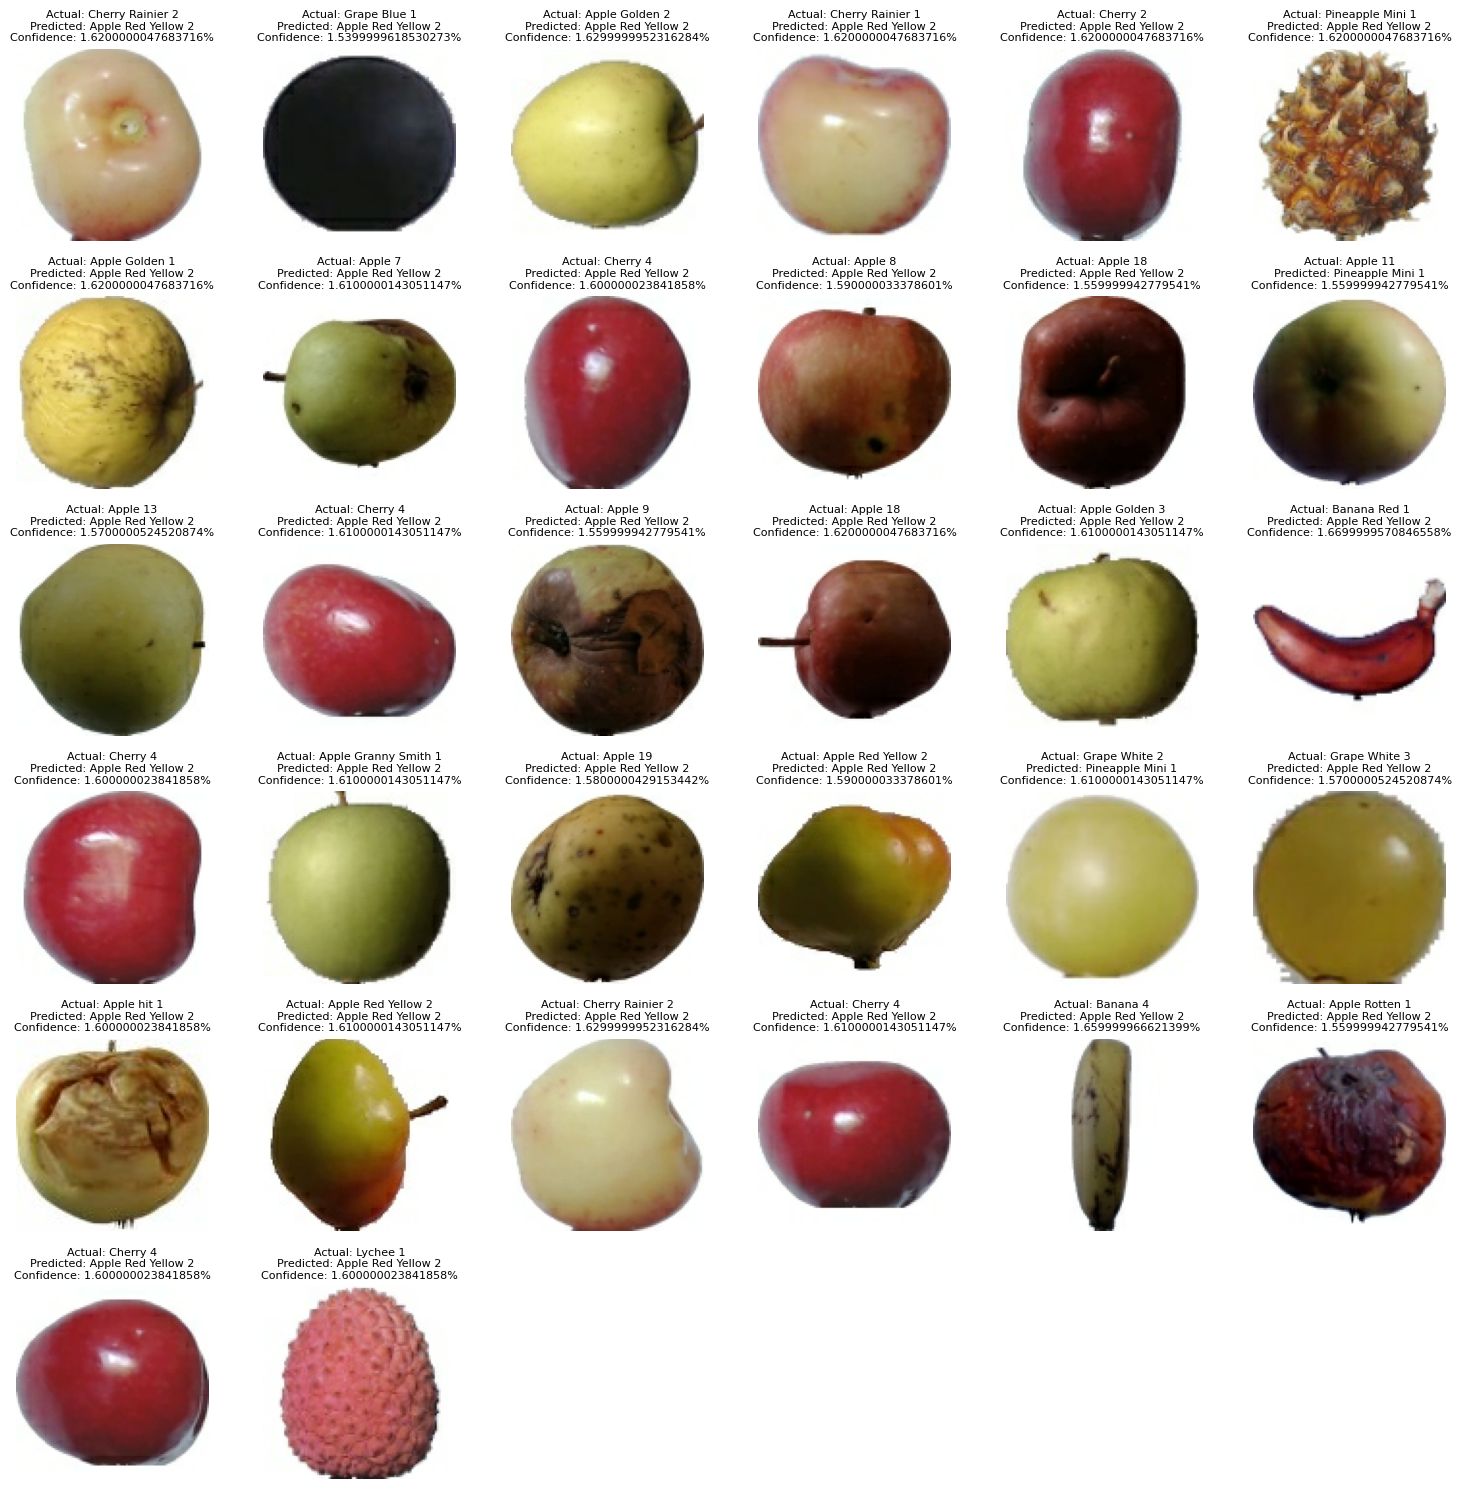

In [82]:
# Visualize predictions for a subset of test images
plot.figure(figsize=(15, 15))

batch_sz = 32

for img_batch, lbl_batch in test_data_flow.take(12):

    for idx in range(batch_sz):
        if idx >= len(img_batch):
            break

        ax = plot.subplot(6, 6, idx + 1)

        resized_img = tf.image.resize(img_batch[idx], (100, 100))
        plot.imshow(resized_img.numpy().astype("uint8"))

        # call the rewritten prediction function
        pred_label, pred_conf = generate_prediction(cnn_model, img_batch[idx])

        true_label = test_labels[lbl_batch[idx]]

        plot.title(
            f"Actual: {true_label}\nPredicted: {pred_label}\nConfidence: {pred_conf}%",
            fontsize=8
        )
        plot.axis("off")

    # stop after visualizing one full batch
    if idx >= batch_sz - 1:
        break

# hide remaining empty subplot spaces (if any)
for idx in range(idx + 1, batch_sz):
    plot.subplot(6, 6, idx + 1)
    plot.axis("off")

plot.tight_layout()
plot.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

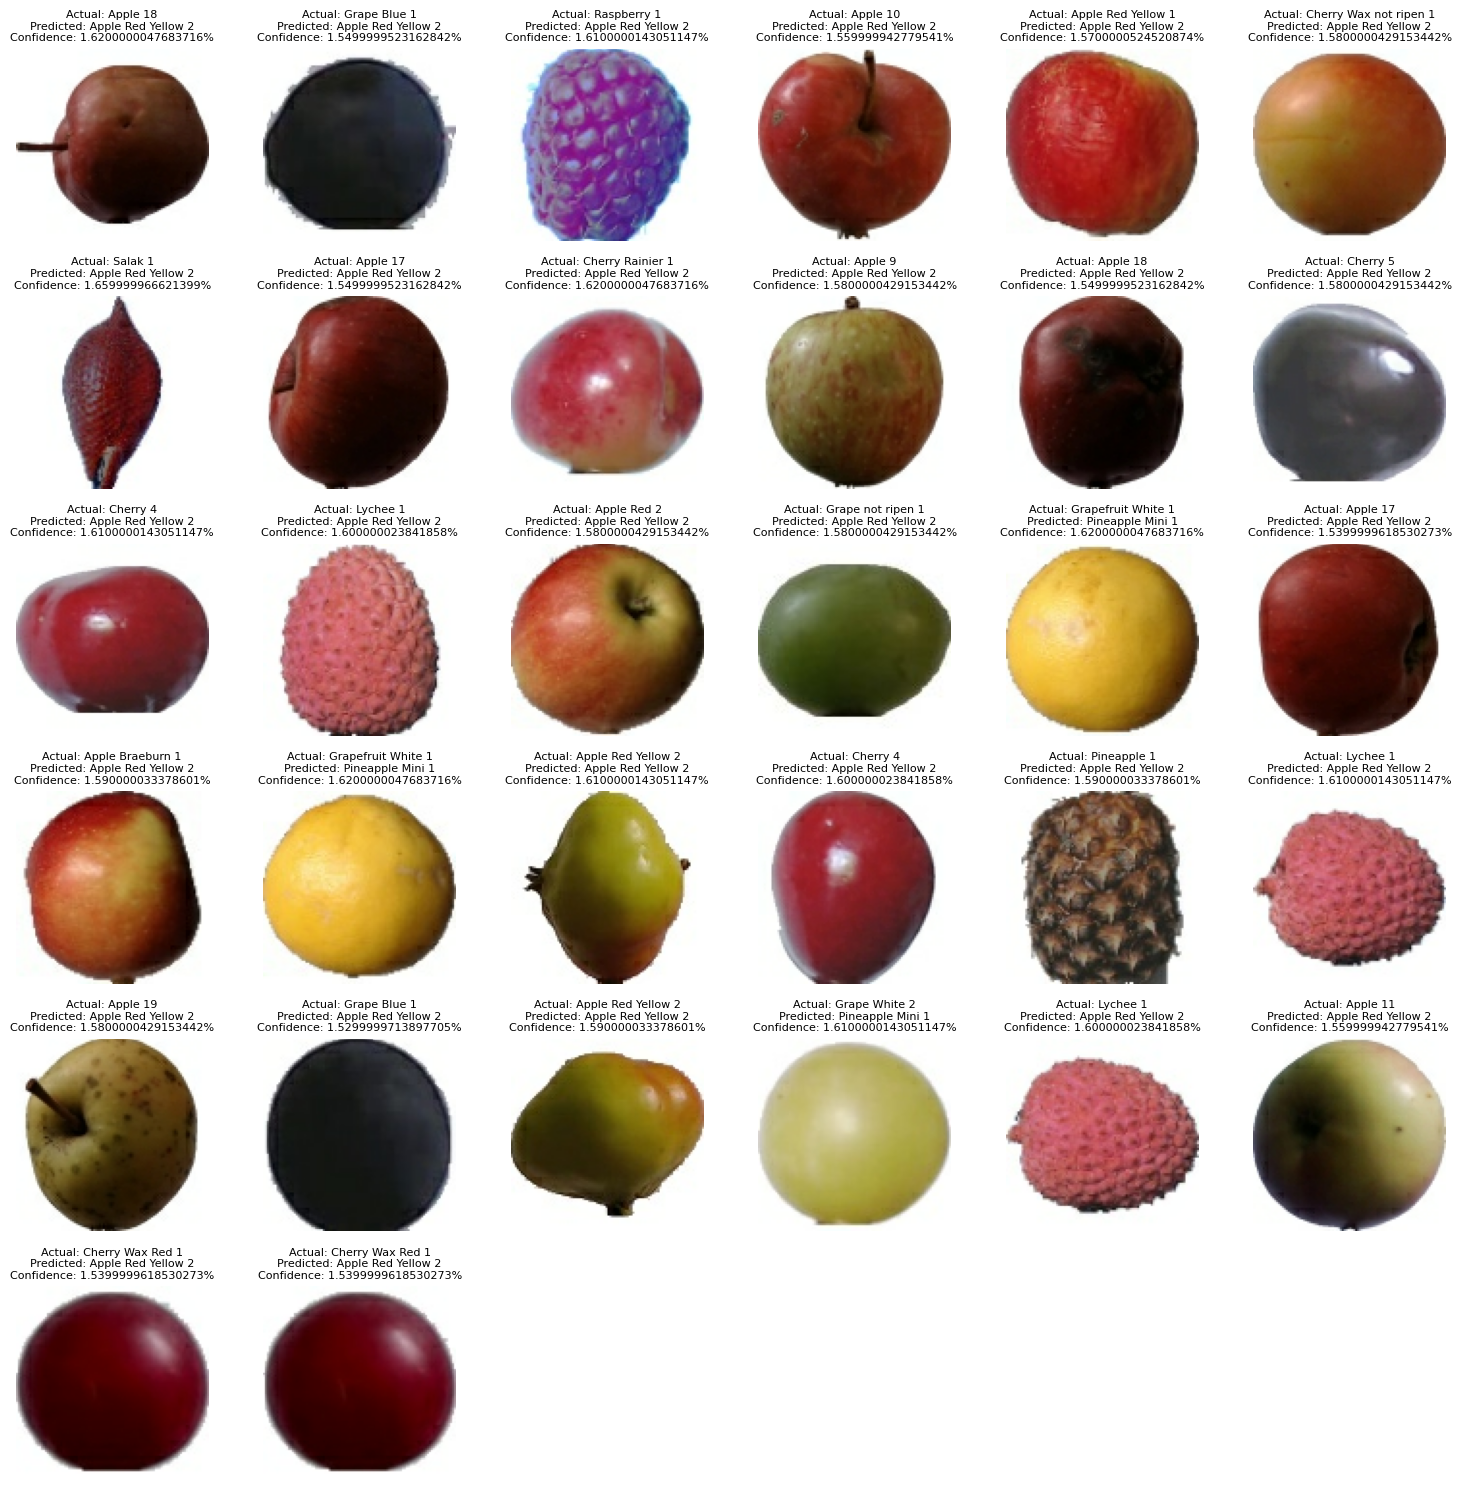

In [84]:
# Display a grid of test images along with their predicted labels
plot.figure(figsize=(15, 15))

batch_sz = 32

for img_batch, lbl_batch in test_data_flow.take(15):

    for idx in range(batch_sz):
        if idx >= len(img_batch):
            break

        ax = plot.subplot(6, 6, idx + 1)

        resized_pic = tf.image.resize(img_batch[idx], (100, 100))
        plot.imshow(resized_pic.numpy().astype("uint8"))

        # call the rewritten prediction function
        pred_lbl, pred_conf = generate_prediction(cnn_model, img_batch[idx])

        true_lbl = test_labels[lbl_batch[idx]]

        plot.title(
            f"Actual: {true_lbl}\nPredicted: {pred_lbl}\nConfidence: {pred_conf}%",
            fontsize=8
        )
        plot.axis("off")

    # stop after processing one full batch
    if idx >= batch_sz - 1:
        break

# hide blank subplots if fewer than batch size images are shown
for idx in range(idx + 1, batch_sz):
    plot.subplot(6, 6, idx + 1)
    plot.axis("off")

plot.tight_layout()
plot.show()

**4. Concluding Notes:**

We had a reasonably good Keras fruit classifier.
The model was able to correctly forecast majority of the discussed types of fruits.
The model appears to falsely mark some of the fruit varieties with greater confidence. These varieties may not be easy to differentiate since they seem alike in terms of colors, shapes, and so on, making them difficult to categorize by the model. This can be improved by -
Keras Training the model with augmented data in Keras
Trying to add Batch normalization to the CNN layers to enhance and stabilize the process of learning.
Increasing layers of the neural network.
Adding L2 regularization
Trying the dropout percentage, learning rate.
Other than the above, the model performs an excellent work of categorizing different fruits and their types like raspberry,pineapple, redcurrant, grapefruit, banana, etc.

There are many real-world applications of fruit image classification: sorting of the ripe fruit, as well as the detection of illnesses. It is efficient, accurate and has the prospects of optimization in the management of various inventory in different industries. Equally, Deep Learning may also be applied to larger types of vegetation, and these applications will be beneficial in the agricultural sectors.Researching into these applications can help generate a sense of awareness in regards to the possible AI projects in the agricultural field.

Besides the classification of fruits, Deep Learning can be applied to the detection of a larger plant species. The technology can determine different species of plants in their natural habitat by examining plant characteristics, including leaves, flowers or fruits and hence this can have a substantial effect on the current research in botany, conservation, and ecological research. It illustrates the usefulness and possible applications of Deep Learning models in the horticulture and agriculture.        